# El dataset de MNIST

In [1]:
import tensorflow as tf
from skimage import io
import numpy as np
from IPython.display import Image
from skimage import io
import random

In [2]:
(images_train, labels_train), (images_test, labels_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [3]:
len(images_test)

10000

In [4]:
len(images_train)

60000

In [5]:
labels_train_encoded = tf.keras.utils.to_categorical(labels_train, num_classes=10)

In [6]:
labels_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

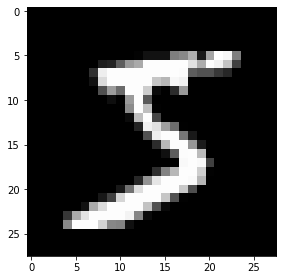

In [7]:
io.imshow(images_train[0])

In [8]:
labels_train_encoded[0] # Se trata de un 5 si contamos

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Una red neuronal con TensorFlow -v1

* Las imágenes de entrenamiento de MNIST viven en un espacio vectorial de dimensión 28*28=784.
* El dataset sew pudede pensar como 60000 filas y 784 columnas.
* Cada dato del dataset es un númnero entre el cero y el uno dependiendo de cuán más o menos blanco sea.

La regresión Softmax es la más natural y más común para implementar en casos de redes neuronales, puede entregrarnos una lista entre ceros y unos y pueden ser interpretados como probabilidades. **Siempre** la última capa de una red neuronal está compuesta por una capa de **SoftMax** y es que la regreseión de Softmax es muy sencilla.

 SoftMax lleva a cabo dos simples cálculos, primero suma las evidencias de que la entrada de datos sea de cierta clase de cada una de las posibles y convierte esas evidencias en probabilidades. Entonces para dar una evidencia de que una imágen sea de una clase en particular, se pondera (suma de productos) de todos y cada uno de las intensidades de los píxeles de las imágenes.
 Existe un factor extra que se llama desviación o bias, lo que hace es sumar un poco más de evidencia. La idea es ser capaces de establecer evidencias de que un objeto se categoriza por pertenecer en la clase i-ésima.
 
 $ evidencia_i = \sum_{j\in{Pixels}} W_{ij}X{j} + b_{J}  $
   
$ \begin{cases} W = \  pesos   \  o   \  kernel   
\\ b = \ desviación  \ o  \ bias \end{cases} $ 

$\hat{y} = softmax(evidencia)$

$ softmax(x) = normalize(exp(x)) $

$ softmax(x)_i = \frac {exp(x_i)}{\sum_{j} exp(x_j)} $

Softmax sirve como método de activación, como link, para indicar al hecho de pertencer o nó a una clase.
Se pueden utilizar diferentes funciones de activaciones, la más habitual es la sigmoide. Con la exponenciación, multiplicamos las probabilidades para sumarle peso, cuanto más cerca de uno estén entonces verdaderamente esta imágen pertenece a esta categoría o clase. Cuando tengamos pocas evidencias, la fracción será pequeña, el exponencial será pequeño y la exponencial bajará y no habrá forma de establecer que pertenezca a dicha clase.

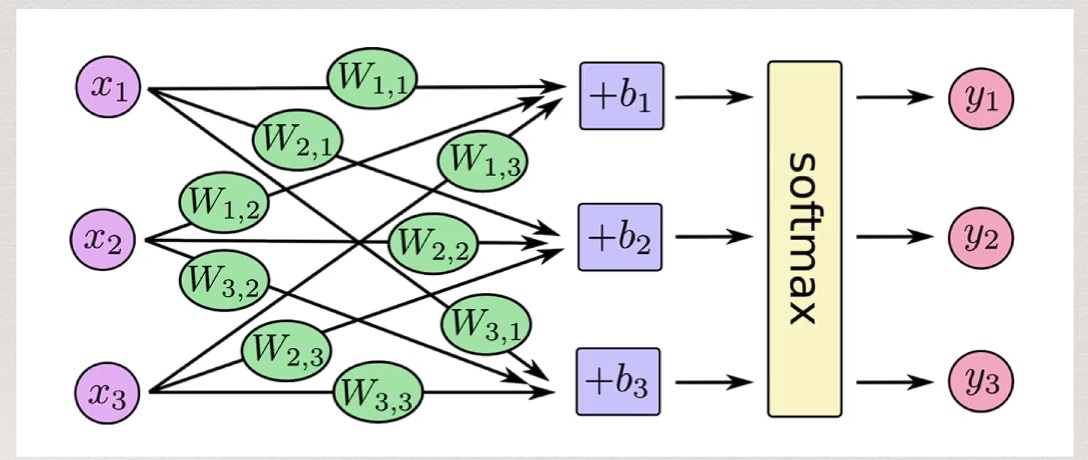

In [9]:
Image(filename="C:/Users/Kevin\Desktop/Kevin/1-Cursos/1-Machine Learning/CURSO UDEMY ML/16-Redes Neuronales/softmax.jpg")

Con este diagrama tendremos una serie de entradas, X1, X2, X3 para cada una de las entradas computaremos una suma ponderada de las X sumándole cada una de las desviaciones, para el ejemplo sólo tenemos tres clases y cada una de las clases las pnderamos entre sí y así suscesivamente. Al final se suman los bias, una vez que tenemos todos los datos posibles aplcamos la función de softmax y luego de aplicar dicha función nos quedarán una serie de posiboles valores. En forma de ecuación nos queda:

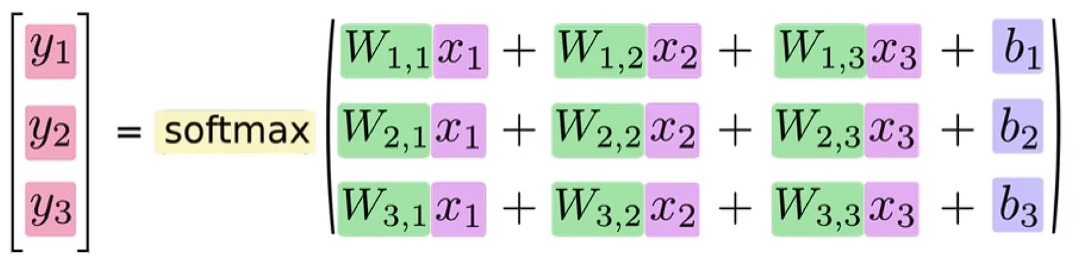

In [10]:
Image(filename="C:/Users/Kevin\Desktop/Kevin/1-Cursos/1-Machine Learning/CURSO UDEMY ML/16-Redes Neuronales/softmax1.jpg")

Sería simplemente, cada una de las clases sería la función softmax, es decir la normalización de las e^(cada una de las operaciones matriciales). Incluso se puede vectorizar este proceso convirtiendo este producto de matrices con sumas dentro en un producto matricial con una suma de vectores, lo cual es múcho más eficiente desde el punto de vista computacional:

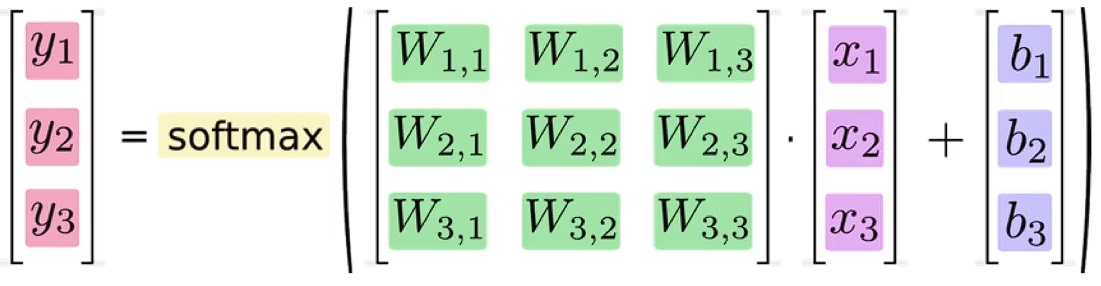

In [11]:
Image(filename="C:/Users/Kevin\Desktop/Kevin/1-Cursos/1-Machine Learning/CURSO UDEMY ML/16-Redes Neuronales/softmax2.jpg")

Nosotros a la hora de escribirlo en tensorflow, python o en R al final lo que implementamos es la versión de que la estimación será la función softmax aplicado al producto de una serie de pesos por las clases **X** más la desviación, **b**.

$\hat{y} = softmax(\omega X + b)$

Recordar que lo que hace **Tensor Flow** es hacer que el trabajo lo realice la gpu y la cpu, fuera de lo que es python, terciariza el laburo a otros sistemas entonces Tensor Flow necesita los **placeholders** para tener una indicación de dónde están apuntados los datos que se procesarán.

In [12]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

In [13]:
dim_input = 28
n_categories = 10

In [14]:
x = tf.compat.v1.placeholder(dtype = tf.float32, shape = [None, 28, 28]) #cualquier longitud como primer parámetro

In [15]:
W = tf.Variable(tf.zeros([28,28,n_categories])) #10 columnas (una pora cada clase)
b = tf.Variable(tf.zeros([n_categories])) # el vector de suma bias será una variable.

Una variable es un tensor que se puede utilizar y modificar y que vive en el grafo de tensor flow para todas las operaciones interactuantes, se puede utilizar, se puede modificar por el propio algoritmo por la popia red neuronal y los algoritmos de ML utilizan las variables para guardar ahí todo lo que van aprendiendo con iteraciones, un **placeholder** NO cambia, una variable sí cambia.
El cero se toma como punto de partida, fijarse las dimensiones que tienen que ser perfectamente compatibles.

In [16]:
softmax_args = tf.matmul(x,W) + b #multiplicación de matrices. Se pone alrevés de como lo escribimos
y_hat = tf.nn.softmax(softmax_args) #para lidiar con los tensores 2D

## Fase de entrenamiento de la red neuronal

Para entrenar un modelo de red neuronal hay que definir qué entendemos porqué un modelo sea bueno, o malo. En la actualidad lo que se representa es el **cost** o **loss**, la idea es minimizar las pérdidas. El modelo siempre va a ser malo, la idea es minimizar lo malo que sea.

 Lo que se suele hacer comunmente, es determinar la función de pérdeida através de la **cross entropy**, surge de: 

$H_{y}(\hat{y}) = -\sum_{i} y_i log(\hat{y}_i)$

$ Y_i $ son los valores reales que ingresemos, de algún modo la entropía cruzada mide cómo de ineficientes son nuestras predicciones con respecto de descubrir la realidad. Es una forma de poder juntar ambos conceptos, entropía y comprobación cruzada.

In [17]:
y_ = tf.placeholder(tf.float32, [None]) #None indica que no vamos a indicar la cantidad de datos.

In [18]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y_hat), reduction_indices=[1]))

* tf.log(y_hat): Calcula el logaritmo de cada uno de los elementos de las predicciones
* se multiplica por el valor original y_
* tf.reduce_sum : sumará todos los elementos en este caso de sólo la segunda dimensión.
* tf.reduce_mean: calculará el promedio de todas las muestras del dataset

A veces para realizar funciones o algoritmos matemáticamente más estables, se utilizan datos sin normalizar porque al final cuando normalizamos, los valores varían de 0 a 1 y cuando tenemos el logaritmo de un valor muy muy chico cercano a cero, quiere decir que el logaritmo es extremadamamente negativo entonces se dice que esos algoritmos son numéricamente **inestables** con lo que se recomienda utilizar es :

 **tf.nn.softmax_cross_entropy_with_logits(softmax_args, y_)**

In [19]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [20]:
session = tf.InteractiveSession()

In [21]:
tf.global_variables_initializer().run()

In [22]:
for _ in range(5000):
    rand = random.sample(range(0, len(images_train)), 100)
    batch_x = images_train[rand]
    batch_y = labels_train[rand]
    session.run(train_step, feed_dict={x:batch_x, y_:batch_y})

InvalidArgumentError: Graph execution error:

Detected at node 'MatMul' defined at (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Kevin\AppData\Local\Temp/ipykernel_16928/2730511702.py", line 1, in <module>
      softmax_args = tf.matmul(x,W) + b #multiplicación de matrices. Se pone alrevés de como lo escribimos
Node: 'MatMul'
In[0] and In[1] must have compatible batch dimensions: [100,28,28] vs. [28,28,10]
	 [[{{node MatMul}}]]

Original stack trace for 'MatMul':
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
    self._run_once()
  File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
    handle._run()
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
    await self.process_one()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
    await dispatch(*args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
    await result
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
    reply_content = await reply_content
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
    result = self._run_cell(
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
    return runner(coro)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Kevin\AppData\Local\Temp/ipykernel_16928/2730511702.py", line 1, in <module>
    softmax_args = tf.matmul(x,W) + b #multiplicación de matrices. Se pone alrevés de como lo escribimos
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py", line 1082, in op_dispatch_handler
    return dispatch_target(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py", line 3666, in matmul
    return gen_math_ops.batch_mat_mul_v2(
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 1589, in batch_mat_mul_v2
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 797, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3754, in _create_op_internal
    ret = Operation(
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2133, in __init__
    self._traceback = tf_stack.extract_stack_for_node(self._c_op)


## Evaluando la red neuronal

In [ ]:
correct_predictions = tf.equal(tf.argmax(labels_train,1), tf.argmax(y_, 1))

In [ ]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [ ]:
print(session.run(accuracy, feed_dict={x:mnist.test.images, y_: mnist.test.labels}))
#No va a funcionar porque Juan Gabriel utiliza un Tensor Flow tan viejo que no sirven estas instrucciones, ninguna, 
#de hecho es totalmente diferente el funcionamiento actual.